<a href="https://colab.research.google.com/github/zangell44/DS-Sprint-02-Storytelling-With-Data/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative_LESSON_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

Variables


*   Income -> x axis
*   Lifespan -> y
*   Population -> population
*   Year -> time (animation frame, alt: small multiples)
*   Country -> annotation, occasionally
*   Region -> color

Qualatative -> verbal
- editorial and contextual explanation w narration

## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [149]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [212]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load & look at data

In [0]:
incomes = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')


In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [249]:
incomes.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,abw,1800,833
1,abw,1801,833
2,abw,1802,833
3,abw,1803,833
4,abw,1804,833


In [158]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [159]:
population.head()

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286
3,abw,1803,19286
4,abw,1804,19286


In [160]:
pd.options.display.max_columns = None
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [161]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,http://www.gapminder.org/gapminder-world/docum...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,http://spreadsheets.google.com/pub?key=t4eF8H_...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
pd.merge?

In [0]:
df = pd.merge(incomes, lifespan, how='inner', on=['geo', 'time'])

In [8]:
df.shape

(41790, 4)

In [0]:
df = pd.merge(df, population)

In [10]:
variables_entity = ['country', 'name', 'world_6region']
entities[variables_entity].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [11]:
df = pd.merge(df, entities[variables_entity], how='left', left_on='geo', right_on='country')
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,abw,1800,833,34.42,19286,abw,Aruba,america
1,abw,1801,833,34.42,19286,abw,Aruba,america
2,abw,1802,833,34.42,19286,abw,Aruba,america
3,abw,1803,833,34.42,19286,abw,Aruba,america
4,abw,1804,833,34.42,19286,abw,Aruba,america


In [0]:
df.drop(columns=['geo', 'country'], inplace=True)

df.rename(columns={
   'time' : 'year',
   'income_per_person_gdppercapita_ppp_inflation_adjusted' : 'income',
   'life_expectancy_years' : 'lifespan',
   'population_total' : 'population',
   'name': 'country',
   'world_6region' : 'region'}, 
   inplace=True)

In [13]:
df.describe()

,year,income,lifespan,population
count,41790.000000,41790.000000,41790.000000,4.179000e+04
mean,1909.357406,4778.593683,43.267181,1.332550e+07
std,63.322969,10502.602580,16.394240,6.502349e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,884.000000,31.200000,3.760282e+05
50%,1909.000000,1449.000000,35.500000,1.915244e+06
75%,1964.000000,3536.750000,56.340000,6.260147e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [170]:
usa = df[df['country']=='United States']
usa.head()

,year,income,lifespan,population,country,region
39381,1800,2127,39.41,6801854,United States,america
39382,1801,2167,39.41,6933517,United States,america
39383,1802,2202,39.41,7067728,United States,america
39384,1803,2166,39.41,7204538,United States,america
39385,1804,2165,39.41,7343995,United States,america


## Explore data

## Plot visualization

In [171]:
now = df[df['year']==2018]
now.head()

,year,income,lifespan,population,country,region
218,2018,39219,76.14,105670,Aruba,america
437,2018,1867,58.69,36373176,Afghanistan,south_asia
656,2018,5846,65.19,30774205,Angola,sub_saharan_africa
875,2018,12424,78.01,2934363,Albania,europe_central_asia
1141,2018,68231,76.89,9541615,United Arab Emirates,middle_east_north_africa


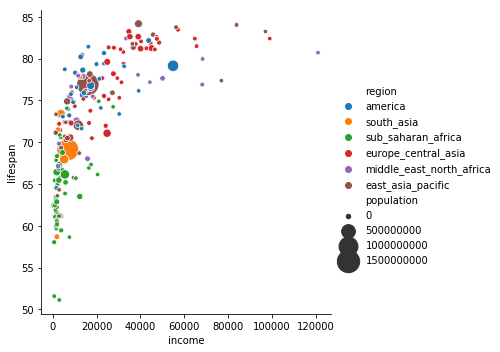

In [172]:
sns.relplot(data=now, 
            x='income', 
            y='lifespan', 
            hue='region', 
            size='population',
            sizes=(20, 500));
            #size_norm=(0,1));

In [0]:
sns.relplot?


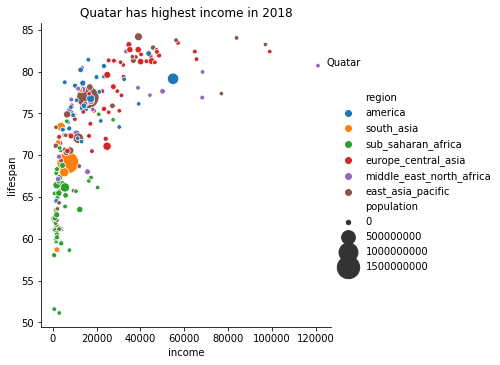

In [174]:
# fig_now, ax_now = plt.subplots(1,1)

quatar = now[now['country']=='Qatar']

sns.relplot(data=now, 
            x='income', 
            y='lifespan', 
            hue='region', 
            size='population',
            sizes=(20, 500)
            )
plt.text(x=quatar['income']+4000, y=quatar['lifespan'], s='Quatar' )
plt.title('Quatar has highest income in 2018');

# Analyze Outliers

In [175]:
rich = now[now['income']>80000]
rich.head()

,year,income,lifespan,population,country,region
22910,2018,99034,82.39,590321,Luxembourg,europe_central_asia
23348,2018,97057,83.24,632418,"Macao, China",east_asia_pacific
31498,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
33031,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [176]:
entities[entities['name']=='Macao, China']

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
145,mac,MACAU SPECIAL ADMINISTRATIVE REGION OF CHINA,Macau,Macao,"China, Macao SAR",Macau,"Macao SAR, China",NaN,NaN,NaN,NaN,NaN,others,"Macao, China",MO,i130,high_income,True,MO,MAC,446.0,NaN,coastline,22.20056,113.54611,eastern_religions,"Macao, China",NaN,False,MO,MACAU,asia,east_asia_pacific


# Multiple Years

In [0]:
centuries = [1818, 1918, 2018]

df_cent = df[df['year'].isin(centuries)]

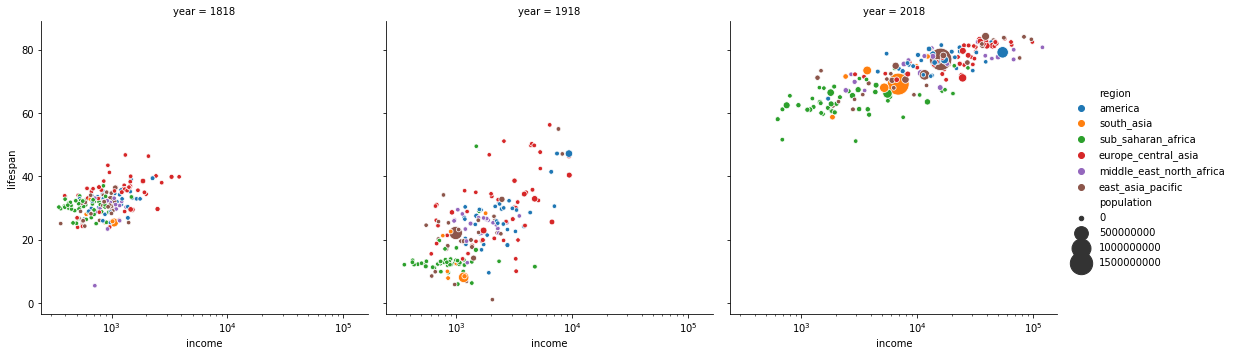

In [209]:
sns.relplot(data=df_cent, 
            x='income', 
            y='lifespan',
            col='year',
            hue='region', 
            size='population',
            sizes=(20, 500)
            )

plt.xscale('log');

In [0]:
years = [1918, 1938, 1958, 1978, 1998, 2018]
df_years = df[df['year'].isin(years)]

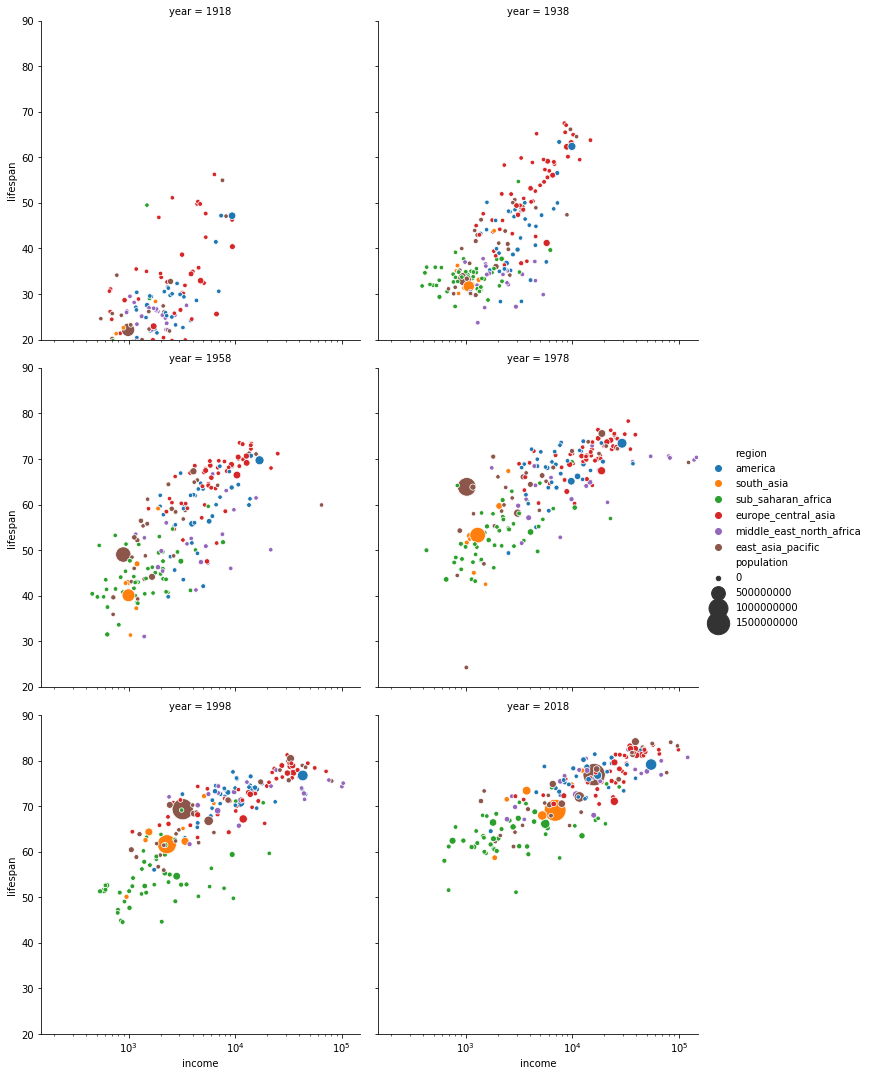

In [200]:
sns.relplot(data=df_years, 
            x='income', 
            y='lifespan',
            col='year',
            hue='region', 
            size='population',
            sizes=(20, 500),
            col_wrap = 2
            )

plt.xlim((150, 150000))
plt.ylim(20,90)
plt.xscale('log');
#plt.subplots.axhline(y=50, color='grey'); # have to do this looping through years?

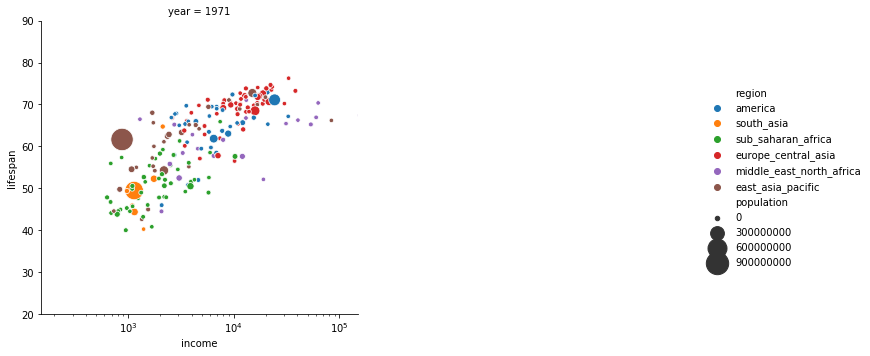

In [211]:
# using Colab slider to select year

year = 1971 #@param {type:"slider", min:1800, max:2018, step:1}


sns.relplot(data=df[df.year==year], 
            x='income', 
            y='lifespan',
            col='year',
            hue='region', 
            size='population',
            sizes=(20, 500),
            col_wrap = 2
            )

plt.xlim((150, 150000))
plt.ylim(20,90)
plt.xscale('log');

# Assignment - Expanding on Visualizations

Turns out, I couldn't quickly find either 
1. Immigration data to calculate mortality rates or 
2. Mortality rates by age

Couldn't do what I wanted to with this data in an afternoon, so decided to explore something else.

In [0]:
# load population by age subsections
df_0_4 = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_aged_0_4_years_total_number--by--geo--time.csv')
df_5_9 = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_aged_5_9_years_total_number--by--geo--time.csv')
df_10_14 = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_aged_10_14_years_total_number--by--geo--time.csv')
df_15_19 = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_aged_15_19_years_total_number--by--geo--time.csv')
df_20_39 = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_aged_20_39_years_total_number--by--geo--time.csv')
df_40_59 = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_aged_40_59_years_total_number--by--geo--time.csv')
df_60plus = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_aged_60plus_years_total_number--by--geo--time.csv')

In [0]:
df_0_4[df_0_4.geo=='usa'].head()

In [0]:
df_5_9[df_5_9.geo=='usa'].head()

In [0]:
df_10_14[df_10_14.geo=='usa'].head()

In [0]:
df_15_19[df_15_19.geo=='usa'].head()

Trying out some animation on the existing charts we'd built.

In [257]:
df.head()

,year,income,lifespan,population,country,region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


In [237]:
!pip install mpld3

    100% |████████████████████████████████| 798kB 6.4MB/s 
  Running setup.py bdist_wheel for mpld3 ... - \ done
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
Successfully built mpld3


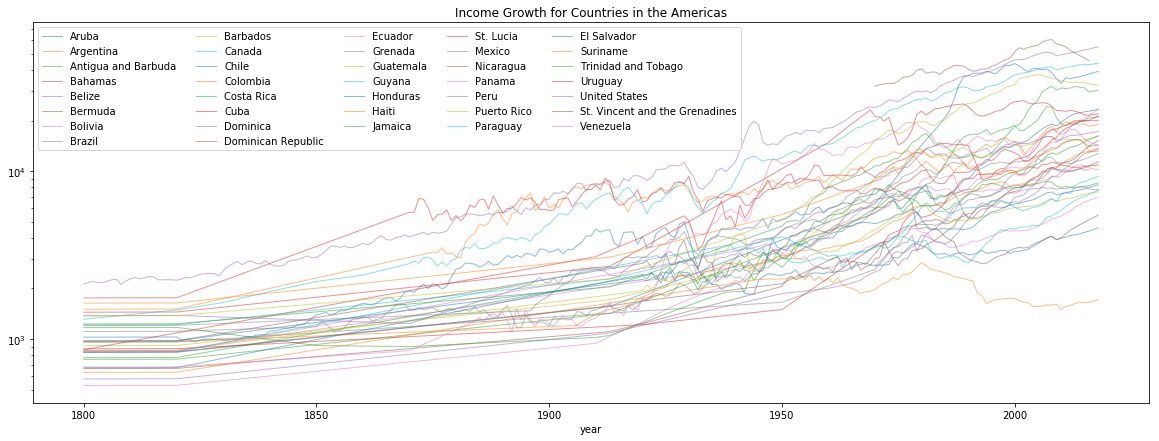

In [73]:
# first lets plot income over time using a regular line plot for different countries

%matplotlib inline

# test line plot on one country
df_americas = df[df.region=='america']

fig_inc, ax_inc = plt.subplots(figsize=(20,7))

# loop through dataframe to plot
for country in df_americas['country'].unique():
  df_country = df_americas[df_americas['country']==country]
  ax_inc = df_country.plot(x='year', 
                           y='income', 
                           lw=1, 
                           alpha=0.5,
                           label=country,
                           ax=ax_inc)
plt.yscale('log')
ax_inc.legend(loc='upper left',
              ncol=5)#bbox_to_anchor=(2050, 0))
ax_inc.set_title('Income Growth for Countries in the Americas')
plt.show()

In [0]:
# fig_inc, ax_inc = plt.subplots()

# for key, grp in df_americas(['country']):
#     ax_inc = grp.plot(ax=ax_inc, kind='line', x='year', y='income', c=key, label=key)

# plt.legend(loc='best')
# plt.show()

In [135]:
# try to make the above line chart interactive
import jinja2
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import mpld3
from mpld3 import plugins, utils


class HighlightLines(plugins.PluginBase):
    """A plugin to highlight lines on hover"""

    JAVASCRIPT = """
    mpld3.register_plugin("linehighlight", LineHighlightPlugin);
    LineHighlightPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LineHighlightPlugin.prototype.constructor = LineHighlightPlugin;
    LineHighlightPlugin.prototype.requiredProps = ["line_ids"];
    LineHighlightPlugin.prototype.defaultProps = {alpha_bg:0.3, alpha_fg:1.0}
    function LineHighlightPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LineHighlightPlugin.prototype.draw = function(){
      for(var i=0; i<this.props.line_ids.length; i++){
         var obj = mpld3.get_element(this.props.line_ids[i], this.fig),
             alpha_fg = this.props.alpha_fg;
             alpha_bg = this.props.alpha_bg;
         obj.elements()
             .on("mouseover", function(d, i){
                            d3.select(this).transition().duration(50)
                              .style("stroke-opacity", alpha_fg); })
             .on("mouseout", function(d, i){
                            d3.select(this).transition().duration(200)
                              .style("stroke-opacity", alpha_bg); });
      }
    };
    """

    def __init__(self, lines):
        self.lines = lines
        self.dict_ = {"type": "linehighlight",
                      "line_ids": [utils.get_id(line) for line in lines],
                      "alpha_bg": lines[0].get_alpha(),
                      "alpha_fg": 1.0}


# N_paths = 50
# N_steps = 100

# manipulation of income data into numpy array for plotting

### COUNTRIES TO BE INCLUDED ###
countries_list = ['United States', 'Canada', 'Brazil', 'Cuba', 'Mexico', 'Venezuela']

df_test = df_americas[(df_americas['country'].isin(countries_list)) & (df_americas['year']>=1900)]

test_array = np.zeros(shape=(df_test['year'].nunique(), df_test['country'].nunique()))
print (test_array.shape)

country_count = 0
year_count = 0
labels=[]

for country in df_test['country'].unique():
  labels.append(country) # append country for legend labeling
  test_array[:,country_count] = df_test[df_test['country']==country]['income']
  country_count +=1

x = df_test['year'].unique()
y = test_array

#y = 0.1 * (np.random.random((N_paths, 219)) - 0.5)
#y = y.cumsum(1)

#fig, ax = plt.subplots()#subplot_kw={'xticks': [], 'yticks': []})
fig_inc, ax_inc = plt.subplots(figsize=(14,9))
lines = ax_inc.plot(x, 
                    y, 
                    lw=4, 
                    alpha=0.5)

# print (x.shape)
# print (y.T.shape)
# print (lines)

# loop through dataframe to plot
# for country in df_americas['country'].unique():
#   df_country = df_americas[df_americas['country']==country]
#   lines = df_country.plot(x='year', 
#                            y='income', 
#                            lw=1, 
#                            alpha=0.5,
#                            label=country,
#                            ax=ax_inc)

ax_inc.legend(loc='upper left', labels=labels)

# axes formatting
ax_inc.set_xlabel('Year')
ax_inc.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax_inc.set_ylabel('Income Per Capita')

# plt.yscale('log')
# ax_inc.get_yaxis().get_major_formatter().labelOnlyBase = False
# #ax_inc.yaxis.set_major_formatter(ticker.ScalarFormatter())
# ax_inc.get_yaxis().set_major_formatter(ticker.ScalarFormatter())


# titling
ax_inc.set_title('Income Per Capita Growth Since 1900 in the Americas')

plugins.connect(fig_inc, HighlightLines(lines))

mpld3.display()

(119, 6)


In [0]:
# testing saving the figure
mpld3.save_html(fig=fig_inc, fileobj='income_per_cap.html', template_type='simple')

In [139]:
!ls

income_per_cap.html  sample_data


In [140]:
!$ echo $PWD

/bin/bash: $: command not found


In [130]:

### COUNTRIES TO BE INCLUDED ###
countries_list_lifespan = ['United States', 'Canada', 'Brazil', 'Cuba', 'Mexico']

df_lifespan = df_americas[df_americas['country'].isin(countries_list_lifespan)]

lifespan_array = np.zeros(shape=(df_lifespan['year'].nunique(), df_lifespan['country'].nunique()))
# print (test_array.shape)

country_count = 0
labels=[]

for country in df_lifespan['country'].unique():
  labels.append(country) # append country for legend labeling
  lifespan_array[:,country_count] = df_lifespan[df_lifespan['country']==country]['lifespan']
  country_count +=1

x = df_lifespan['year'].unique()
y = lifespan_array

#y = 0.1 * (np.random.random((N_paths, 219)) - 0.5)
#y = y.cumsum(1)

#fig, ax = plt.subplots()#subplot_kw={'xticks': [], 'yticks': []})
fig_lifespan, ax_lifespan = plt.subplots(figsize=(15,9))
lines = ax_lifespan.plot(x, 
                    y, 
                    lw=4, 
                    alpha=0.5)

# print (x.shape)
# print (y.T.shape)
# print (lines)

# loop through dataframe to plot
# for country in df_americas['country'].unique():
#   df_country = df_americas[df_americas['country']==country]
#   lines = df_country.plot(x='year', 
#                            y='income', 
#                            lw=1, 
#                            alpha=0.5,
#                            label=country,
#                            ax=ax_inc)

ax_lifespan.legend(loc='upper left', labels=labels)

# axes formatting
ax_lifespan.set_xlabel('Year')
ax_lifespan.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax_lifespan.set_ylabel('Life Expectancy')

# titling
ax_lifespan.set_title('Life Expectancy Over Time in the Americas')

plugins.connect(fig_lifespan, HighlightLines(lines))

mpld3.display()

In [0]:
df_test = df_americas[df_americas['country'].isin(['United States', 'Canada'])]

test_array = np.zeros(shape=(df_test['year'].nunique(), df_test['country'].nunique()))
print (test_array.shape)

country_count = 0
year_count = 0
labels=[]

for country in df_test['country'].unique():
  labels.append(country) # append country for legend labeling
  test_array[:,country_count] = df_test[df_test['country']==country]['income']
  country_count +=1
  
#test_array[:,0] = df_americas[df_americas['country']=='United States']['income']
test_array

In [258]:
import jinja2
import json
import numpy as np
import matplotlib.pyplot as plt

import mpld3
from mpld3 import plugins, utils


class HighlightLines(plugins.PluginBase):
    """A plugin to highlight lines on hover"""

    JAVASCRIPT = """
    mpld3.register_plugin("linehighlight", LineHighlightPlugin);
    LineHighlightPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LineHighlightPlugin.prototype.constructor = LineHighlightPlugin;
    LineHighlightPlugin.prototype.requiredProps = ["line_ids"];
    LineHighlightPlugin.prototype.defaultProps = {alpha_bg:0.3, alpha_fg:1.0}
    function LineHighlightPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LineHighlightPlugin.prototype.draw = function(){
      for(var i=0; i<this.props.line_ids.length; i++){
         var obj = mpld3.get_element(this.props.line_ids[i], this.fig),
             alpha_fg = this.props.alpha_fg;
             alpha_bg = this.props.alpha_bg;
         obj.elements()
             .on("mouseover", function(d, i){
                            d3.select(this).transition().duration(50)
                              .style("stroke-opacity", alpha_fg); })
             .on("mouseout", function(d, i){
                            d3.select(this).transition().duration(200)
                              .style("stroke-opacity", alpha_bg); });
      }
    };
    """

    def __init__(self, lines):
        self.lines = lines
        self.dict_ = {"type": "linehighlight",
                      "line_ids": [utils.get_id(line) for line in lines],
                      "alpha_bg": lines[0].get_alpha(),
                      "alpha_fg": 1.0}


N_paths = 50
N_steps = 100

x = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y = y.cumsum(1)

fig, ax = plt.subplots()#subplot_kw={'xticks': [], 'yticks': []})
lines = ax.plot(x, y.T, lw=4, alpha=0.1)
plugins.connect(fig, HighlightLines(lines))

mpld3.display()

<IPython.core.display.Javascript object>

In [0]:
import mpld3
from mpld3 import plugins
np.random.seed(9615)

# generate df
N = 100
df = pd.DataFrame((.1 * (np.random.random((N, 5)) - .5)).cumsum(0),
                  columns=['a', 'b', 'c', 'd', 'e'],)

# plot line + confidence interval
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

for key, val in df.iteritems():
    l, = ax.plot(val.index, val.values, label=key)
    ax.fill_between(val.index,
                    val.values * .5, val.values * 1.5,
                    color=l.get_color(), alpha=.4)

# define interactive legend

handles, labels = ax.get_legend_handles_labels() # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(zip(handles,
                                                         ax.collections),
                                                     labels,
                                                     alpha_unsel=0.5,
                                                     alpha_over=1.5, 
                                                     start_visible=True)
plugins.connect(fig, interactive_legend)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Interactive legend', size=20)

mpld3.display()